In [95]:
#import for analysis data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [96]:
#get files
files = [file for file in os.listdir("home-credit-default-risk/")]
print(files)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [97]:
application_test = pd.read_csv("home-credit-default-risk/application_test.csv")
application_train = pd.read_csv("home-credit-default-risk/application_train.csv")
bureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
credit_card_balance = pd.read_csv("home-credit-default-risk/credit_card_balance.csv")
installments_payments = pd.read_csv("home-credit-default-risk/installments_payments.csv")
posh_cash_balance = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")
previous_application = pd.read_csv("home-credit-default-risk/previous_application.csv")

Check Sample Data

In [98]:
application_test.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41807,406253,Cash loans,M,Y,Y,2,135000.0,208512.0,22023.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019101,-12986,-3648,-662.0,-4532,11.0,1,1,0,1,0,0,Core staff,4.0,2,2,SATURDAY,9,0,0,0,0,1,1,Agriculture,0.294523,0.599730,0.454321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2158.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
4517,132300,Cash loans,F,N,Y,0,36000.0,144000.0,10476.0,144000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-15348,-1809,-9006.0,-4834,NaN,1,1,0,1,0,0,Managers,2.0,2,2,FRIDAY,9,0,0,0,1,1,1,Postal,NaN,0.079278,0.288130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
12647,192052,Cash loans,F,N,Y,1,157500.0,280170.0,29547.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009630,-11358,-2374,-2072.0,-2072,NaN,1,1,0,1,0,1,Cooking staff,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.235282,0.301408,0.368969,0.0361,0.0000,0.9712,NaN,NaN,0.00,0.0345,...,0.0364,0.0000,0.9712,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0110,NaN,0.0000,NaN,specific housing,0.0151,"Stone, brick",No,1.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
46480,439727,Cash loans,F,N,Y,0,315000.0,201469.5,11056.5,153000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.020713,-11143,-2048,-548.0,-3746,NaN,1,1,0,1,0,0,Core staff,1.0,3,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.328534,0.576961,0.323311,0.2175,0.0900,0.9965,NaN,NaN,0.16,0.1379,...,0.2196,0.0900,0.9965,NaN,NaN,0.16,0.1379,0.3750,NaN,NaN,NaN,0.1906,NaN,0.0150,NaN,block of flats,0.1842,Panel,No,0.0,0.0,0.0,0.0,-585.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
45175,430818,Cash loans,M,Y,N,0,180000.0,341298.0,40635.0,301500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-17335,-12

In [99]:
application_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
131590,252621,0,Cash loans,F,N,Y,1,189000.0,396000.0,39168.0,396000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.018209,-9946,-1961,-1192.0,-1477,NaN,1,1,0,1,0,0,Medicine staff,3.0,3,3,THURSDAY,12,0,0,0,0,0,0,Medicine,0.234685,0.739593,0.647977,0.1175,NaN,0.9846,NaN,NaN,NaN,...,0.1187,NaN,0.9846,NaN,NaN,NaN,0.2069,0.1667,NaN,NaN,NaN,0.0883,NaN,0.0000,NaN,block of flats,0.0822,Panel,No,2.0,1.0,2.0,1.0,-806.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
153883,278346,0,Cash loans,F,N,Y,0,157500.0,508495.5,21672.0,454500.0,Family,State servant,Secondary / secondary special,Widow,House / apartment,0.011657,-18874,-163,-4006.0,-2185,NaN,1,1,1,1,0,0,Waiters/barmen staff,1.0,1,1,WEDNESDAY,21,0,1,1,0,1,1,Medicine,NaN,0.544006,0.329655,0.0732,0.0000,0.9598,0.4492,0.0127,0.00,...,0.0739,0.0000,0.9598,0.4566,0.0128,0.00,0.2069,0.1250,0.1667,0.1069,0.0573,0.0556,0.0155,0.0222,reg oper account,block of flats,0.0477,Others,No,0.0,0.0,0.0,0.0,-401.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
302645,450635,0,Cash loans,M,N,Y,0,112500.0,703728.0,36058.5,607500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.024610,-22153,-285,-7666.0,-4172,NaN,1,1,0,1,0,1,Security staff,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,Trade: type 3,NaN,0.607358,0.684828,0.0825,0.1096,0.9896,NaN,NaN,0.00,...,0.0833,0.1096,0.9896,NaN,NaN,0.00,0.1379,0.1667,NaN,0.0311,NaN,0.0865,NaN,NaN,NaN,block of flats,0.0668,Panel,No,0.0,0.0,0.0,0.0,-999.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
66013,176555,0,Cash loans,F,N,N,0,90000.0,454500.0,21865.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.008068,-18242,-3984,-7061.0,-1779,NaN,1,1,1,1,0,0,NaN,1.0,3,3,MONDAY,5,0,0,0,0,0,0,Medicine,NaN,0.186455,0.465069,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-891.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
289495,435385,0,Revolving loans,M,N,N,0,157500.0,337500.0,16875.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Civil marri

In [100]:
bureau_balance.sample(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
13722344,6282882,-27,C
26984975,5340039,-3,0
20003681,6367712,-46,C
9021814,6095593,-11,C
14516707,5877556,-22,0


In [101]:
bureau.sample(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
860830,385420,6042487,Closed,currency 1,-2617,0,-2433.0,-2453.0,NaN,0,22041.00,0.000,NaN,0.0,Consumer credit,-1778,5610.015
526463,123149,6297573,Closed,currency 1,-2036,0,-215.0,-215.0,NaN,0,225000.00,0.000,0.0,0.0,Consumer credit,-196,NaN
1662146,449502,6647688,Active,currency 1,-45,0,321.0,NaN,NaN,0,112201.83,103845.105,NaN,0.0,Consumer credit,-11,NaN
152295,138219,6590211,Closed,currency 1,-309,0,-158.0,-158.0,0.0,0,67905.00,0.000,0.0,0.0,Consumer credit,-156,NaN
1350163,213149,5167477,Closed,currency 1,-2219,0,-2093.0,-2080.0,NaN,0,18504.00,0.000,0.0,0.0,Consumer credit,-775,NaN


In [102]:
credit_card_balance.sample(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
823044,2641701,123561,-13,0.00,45000,0.0,0.0,0.0,0.0,0.00,42.930,0.000,0.000,0.00,0.00,0.0,0,0.0,0.0,44.0,Active,0,0
437685,2729525,434944,-1,0.00,45000,NaN,0.0,NaN,NaN,0.00,NaN,0.000,0.000,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
2325385,2583612,279701,-25,0.00,450000,0.0,0.0,0.0,0.0,2958.66,61426.755,61426.755,0.000,0.00,0.00,0.0,0,0.0,0.0,5.0,Active,0,0
2440238,2035500,219840,-43,0.00,0,0.0,0.0,0.0,0.0,0.00,274.230,0.000,0.000,-274.23,-274.23,0.0,0,0.0,0.0,5.0,Active,0,0
3131958,1378381,119376,-82,61369.11,90000,0.0,0.0,0.0,0.0,5400.00,5400.000,5400.000,58883.805,62629.11,63889.11,0.0,0,0.0,0.0,27.0,Active,0,0


In [103]:
installments_payments.sample(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
9185731,2353571,319258,0.0,5,-775.0,-790.0,2250.000,2250.000
2695074,2228040,140053,1.0,3,-540.0,-553.0,57215.745,57215.745
3612496,2291573,116119,1.0,5,-1408.0,-1421.0,39495.150,39495.150
3464225,2290715,181349,0.0,16,-956.0,-956.0,156.780,156.780
6210154,1545214,242355,0.0,43,-1527.0,-1526.0,9000.000,9000.000


In [104]:
posh_cash_balance.sample(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8570572,2244089,288464,-52,7.0,2.0,Active,0,0
5835300,1279933,285823,-23,18.0,14.0,Active,0,0
7458935,1645601,300340,-2,36.0,22.0,Active,0,0
5839168,2040282,140838,-80,10.0,10.0,Active,0,0
4274174,1517952,258149,-45,24.0,19.0,Active,0,0


In [105]:
previous_application.sample(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
500349,1132122,407874,Revolving loans,45000.000,900000.0,900000.0,NaN,900000.0,THURSDAY,13,Y,1,NaN,NaN,NaN,XAP,Approved,-663,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,-637.0,-615.0,365243.0,365243.0,365243.0,0.0
777632,2715150,225312,Consumer loans,5155.965,43150.5,38650.5,4500.0,43150.5,WEDNESDAY,16,Y,1,0.113577,NaN,NaN,XAP,Approved,-2559,XNA,XAP,Unaccompanied,New,Mobile,POS,XNA,Stone,22,Connectivity,10.0,high,POS mobile with interest,365243.0,-2515.0,-2245.0,-2245.0,-2240.0,0.0
1372396,1603145,341983,Consumer loans,5879.655,32355.0,30559.5,3235.5,32355.0,SATURDAY,11,Y,1,0.104268,NaN,NaN,XAP,Approved,-2675,Cash through the bank,XAP,Family,New,Audio/Video,POS,XNA,Country-wide,-1,Consumer electronics,6.0,high,POS household with interest,365243.0,-2644.0,-2494.0,-2494.0,-2485.0,1.0
1298877,2177585,302103,Consumer loans,2543.985,21555.0,21217.5,2250.0,21555.0,THURSDAY,11,Y,1,0.104419,NaN,NaN,XAP,Approved,-1707,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,high,POS mobile with interest,365243.0,-1671.0,-1341.0,-1431.0,-1424.0,0.0
813066,2645893,363527,Cash loans,11431.800,135000.0,135000.0,0.0,135000.0,MONDAY,16,Y,1,0.000000,NaN,NaN,Other,Refused,-2347,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,0,XNA,18.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

Info Kolom tiap Table

In [107]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [108]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [109]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [110]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [111]:
posh_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [112]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [113]:
application_train.shape

(307511, 122)

### Data Understanding

In [114]:
print(application_test.shape)
print(application_train.shape)

(48744, 121)
(307511, 122)


Cek data describe berdasarkan type data

In [115]:
#numerical describe
describeNum = application_train.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
TARGET,307511.000000,0.080729,0.272419,0.000000,0.000000,0.000000,0.000000,1.000000
CNT_CHILDREN,307511.000000,0.417052,0.722121,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
REGION_POPULATION_RELATIVE,307511.000000,0.020868,0.013831,0.000290,0.010006,0.018850,0.028663,0.072508
DAYS_BIRTH,307511.000000,-16036.995067,4363.988632,-25229.000000,-19682.000000,-15750.000000,-12413.000000,-7489.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000


In [116]:
#data object
data_object = application_train.select_dtypes(include="object")
data_object.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


### Cek Missing Data

In [117]:
#Get Data
data = application_train[["TARGET","SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
"NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
"FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]

data_test = application_test[["SK_ID_CURR", "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
"NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
"FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]

In [118]:
print(data.shape)
print(data_test.shape)

(307511, 25)
(48744, 23)


In [119]:
#pengecekan missing data di setiap feature
df_null = data.isnull().sum().reset_index()
df_null.columns = ["features", "missing_value"]
df_null

,features,missing_value
0,TARGET,0
1,SK_ID_CURR,0
2,TARGET,0
3,NAME_CONTRACT_TYPE,0
4,CODE_GENDER,0
5,FLAG_OWN_CAR,0
6,FLAG_OWN_REALTY,0
7,CNT_CHILDREN,0
8,AMT_INCOME_TOTAL,0
9,AMT_CREDIT,0


In [120]:
#pengecekan missing data di setiap feature
df_null_test = data_test.isnull().sum().reset_index()
df_null_test.columns = ["features", "missing_value"]
df_null_test

,features,missing_value
0,SK_ID_CURR,0
1,NAME_CONTRACT_TYPE,0
2,CODE_GENDER,0
3,FLAG_OWN_CAR,0
4,FLAG_OWN_REALTY,0
5,CNT_CHILDREN,0
6,AMT_INCOME_TOTAL,0
7,AMT_CREDIT,0
8,AMT_ANNUITY,24
9,AMT_GOODS_PRICE,0


In [121]:
#cek type suite
data.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [122]:
# set null type suite to "Unaccompanied"
data["NAME_TYPE_SUITE"] = data["NAME_TYPE_SUITE"].fillna("Unaccompanied")
data_test["NAME_TYPE_SUITE"] = data_test["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [123]:
#cek type suite
data.groupby("OCCUPATION_TYPE").agg({"SK_ID_CURR":"count"})

,SK_ID_CURR
OCCUPATION_TYPE,
Accountants,9813
Cleaning staff,4653
Cooking staff,5946
Core staff,27570
Drivers,18603
HR staff,563
High skill tech staff,11380
IT staff,526
Laborers,55186


In [124]:
# set null type suite to "Unaccompanied"
data["OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].fillna("Laborers")
data_test["OCCUPATION_TYPE"] = data_test["OCCUPATION_TYPE"].fillna("Laborers")

In [125]:
#delete null data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307221 non-null  int64  
 1   SK_ID_CURR           307221 non-null  int64  
 2   TARGET               307221 non-null  int64  
 3   NAME_CONTRACT_TYPE   307221 non-null  object 
 4   CODE_GENDER          307221 non-null  object 
 5   FLAG_OWN_CAR         307221 non-null  object 
 6   FLAG_OWN_REALTY      307221 non-null  object 
 7   CNT_CHILDREN         307221 non-null  int64  
 8   AMT_INCOME_TOTAL     307221 non-null  float64
 9   AMT_CREDIT           307221 non-null  float64
 10  AMT_ANNUITY          307221 non-null  float64
 11  AMT_GOODS_PRICE      307221 non-null  float64
 12  NAME_TYPE_SUITE      307221 non-null  object 
 13  NAME_INCOME_TYPE     307221 non-null  object 
 14  NAME_EDUCATION_TYPE  307221 non-null  object 
 15  NAME_FAMILY_STATU

In [126]:
#delete null data
data_test = data_test.dropna()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48720 entries, 0 to 48743
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_CURR           48720 non-null  int64  
 1   NAME_CONTRACT_TYPE   48720 non-null  object 
 2   CODE_GENDER          48720 non-null  object 
 3   FLAG_OWN_CAR         48720 non-null  object 
 4   FLAG_OWN_REALTY      48720 non-null  object 
 5   CNT_CHILDREN         48720 non-null  int64  
 6   AMT_INCOME_TOTAL     48720 non-null  float64
 7   AMT_CREDIT           48720 non-null  float64
 8   AMT_ANNUITY          48720 non-null  float64
 9   AMT_GOODS_PRICE      48720 non-null  float64
 10  NAME_TYPE_SUITE      48720 non-null  object 
 11  NAME_INCOME_TYPE     48720 non-null  object 
 12  NAME_EDUCATION_TYPE  48720 non-null  object 
 13  NAME_FAMILY_STATUS   48720 non-null  object 
 14  NAME_HOUSING_TYPE    48720 non-null  object 
 15  FLAG_MOBIL           48720 non-null 

### Cek Duplicate Data

In [127]:
#check total duplicate data
data.duplicated().sum()

0

there is no duplicate data , so we can do next process

### Cek Persebaran Data

Data Numerical

In [128]:
data_number = data.select_dtypes(include="number")
total_num = len(data_number.columns)

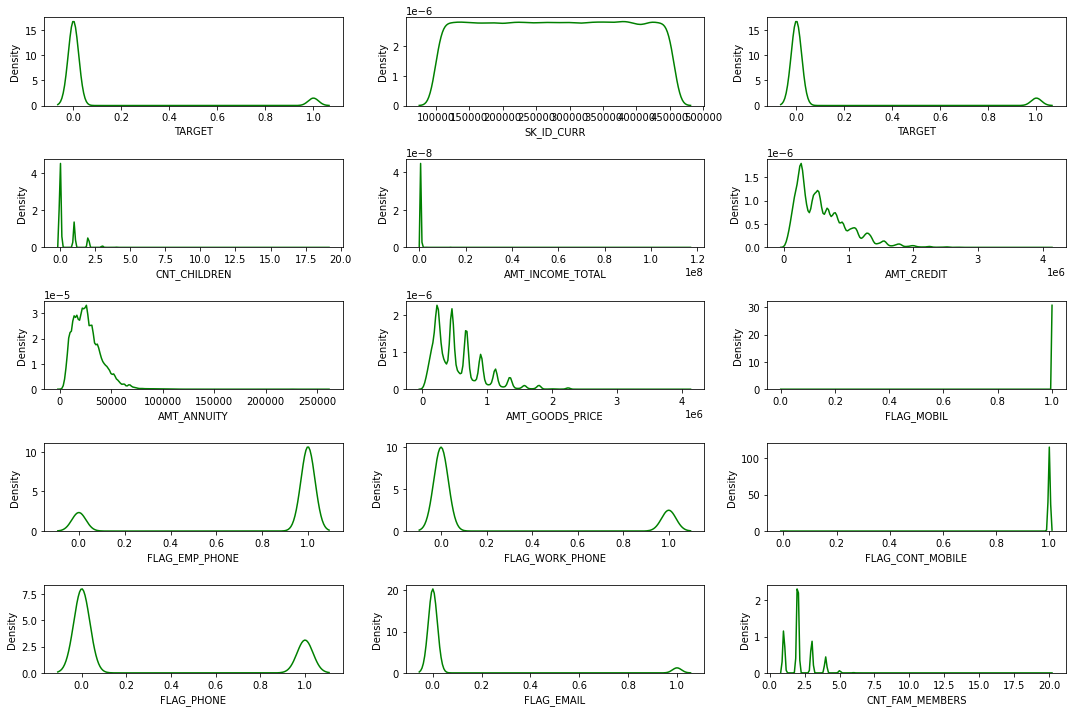

In [129]:
k = total_num
n = 3
m = (k+2) // n
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 2))
for i, (name, col) in enumerate(data_number.iteritems()):
    r, c = i // n, i % n
    axe = axes[r, c]
    sns.kdeplot(x = col, color='green', data=data_number, ax=axe)

fig.tight_layout()

in data distribution we know mayority data have skew distribution
"Target" is target

Data Categorical

In [130]:
data_cat_unique = data_object.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

,feature,unique value
11,ORGANIZATION_TYPE,58
9,OCCUPATION_TYPE,18
5,NAME_INCOME_TYPE,8
4,NAME_TYPE_SUITE,7
10,WEEKDAY_APPR_PROCESS_START,7
14,WALLSMATERIAL_MODE,7
7,NAME_FAMILY_STATUS,6
8,NAME_HOUSING_TYPE,6
6,NAME_EDUCATION_TYPE,5
12,FONDKAPREMONT_MODE,4


data unique masih di bawah 10 ( masih oke )

### Change data object to Numeric

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307221 non-null  int64  
 1   SK_ID_CURR           307221 non-null  int64  
 2   TARGET               307221 non-null  int64  
 3   NAME_CONTRACT_TYPE   307221 non-null  object 
 4   CODE_GENDER          307221 non-null  object 
 5   FLAG_OWN_CAR         307221 non-null  object 
 6   FLAG_OWN_REALTY      307221 non-null  object 
 7   CNT_CHILDREN         307221 non-null  int64  
 8   AMT_INCOME_TOTAL     307221 non-null  float64
 9   AMT_CREDIT           307221 non-null  float64
 10  AMT_ANNUITY          307221 non-null  float64
 11  AMT_GOODS_PRICE      307221 non-null  float64
 12  NAME_TYPE_SUITE      307221 non-null  object 
 13  NAME_INCOME_TYPE     307221 non-null  object 
 14  NAME_EDUCATION_TYPE  307221 non-null  object 
 15  NAME_FAMILY_STATU

In [132]:
application_train.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [133]:
data = data.replace({"NAME_CONTRACT_TYPE":{"Cash loans":0 , "Revolving loans":1} , "CODE_GENDER":{"M":0,"F":1, "XNA":1},
                                 "FLAG_OWN_CAR":{"N":0,"Y":1}, "FLAG_OWN_REALTY":{"N":0,"Y":1} , "NAME_CONTRACT_STATUS" : {"Approved": 0, "Refused" : 1, "Canceled": 2, "Unused offer" : 2 } ,
                                 "CREDIT_ACTIVE" : {"Closed": 0, "Active" : 1, "Sold": 2, "Bad debt" : 3 }, 
                     "NAME_EDUCATION_TYPE" : {"Secondary / secondary special" : 1 , "Higher education" : 2 , "Incomplete higher": 2 , "Lower secondary" : 0, "Academic degree" : 3}}) 
data.head()

,TARGET,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,1,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,1.0
1,0,100003,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,2,Married,House / apartment,1,1,0,1,1,0,Core staff,2.0
2,0,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,1,Single / not married,House / apartment,1,1,1,1,1,0,Laborers,1.0
3,0,100006,0,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,1,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers,2.0
4,0,100007,0,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,1,Single / not married,House / apartment,1,1,0,1,0,0,Core staff,1.0


In [134]:
data_test = data_test.replace({"NAME_CONTRACT_TYPE":{"Cash loans":0 , "Revolving loans":1} , "CODE_GENDER":{"M":0,"F":1, "XNA":1},
                                 "FLAG_OWN_CAR":{"N":0,"Y":1}, "FLAG_OWN_REALTY":{"N":0,"Y":1} , "NAME_CONTRACT_STATUS" : {"Approved": 0, "Refused" : 1, "Canceled": 2, "Unused offer" : 2 } ,
                                 "CREDIT_ACTIVE" : {"Closed": 0, "Active" : 1, "Sold": 2, "Bad debt" : 3 }, 
                     "NAME_EDUCATION_TYPE" : {"Secondary / secondary special" : 1 , "Higher education" : 2 , "Incomplete higher": 2 , "Lower secondary" : 0, "Academic degree" : 3}}) 
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100001,0,1,0,1,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,2,Married,House / apartment,1,1,0,1,0,1,Laborers,2.0
1,100005,0,0,0,1,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,1,Married,House / apartment,1,1,0,1,0,0,Low-skill Laborers,2.0
2,100013,0,0,1,1,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,2,Married,House / apartment,1,1,0,1,0,0,Drivers,2.0
3,100028,0,1,0,1,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,1,Married,House / apartment,1,1,0,1,1,0,Sales staff,4.0
4,100038,0,0,1,0,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,1,Married,House / apartment,1,1,1,1,0,0,Laborers,3.0


In [135]:
categorical = data.select_dtypes(include="object")
col_names_cat = categorical.columns

In [136]:
le = LabelEncoder() 
data = data.apply(lambda col_names_cat: le.fit_transform(col_names_cat)) 
data.head()

,TARGET,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,0,1,0,0,0,1,0,1753,1191,4588,189,6,7,1,3,1,1,1,0,1,1,0,8,0
1,0,1,0,0,1,0,0,0,2063,4338,6985,704,1,4,2,1,1,1,1,0,1,1,0,3,1
2,0,2,0,1,0,1,1,0,338,228,662,30,6,7,1,3,1,1,1,1,1,1,0,8,0
3,0,3,0,0,1,0,1,0,1169,836,5680,145,6,7,1,0,1,1,1,0,1,0,0,8,1
4,0,4,0,0,0,0,1,0,1018,1635,3960,352,6,7,1,3,1,1,1,0,1,0,0,3,0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   TARGET               307221 non-null  int64
 1   SK_ID_CURR           307221 non-null  int64
 2   TARGET               307221 non-null  int64
 3   NAME_CONTRACT_TYPE   307221 non-null  int64
 4   CODE_GENDER          307221 non-null  int64
 5   FLAG_OWN_CAR         307221 non-null  int64
 6   FLAG_OWN_REALTY      307221 non-null  int64
 7   CNT_CHILDREN         307221 non-null  int64
 8   AMT_INCOME_TOTAL     307221 non-null  int64
 9   AMT_CREDIT           307221 non-null  int64
 10  AMT_ANNUITY          307221 non-null  int64
 11  AMT_GOODS_PRICE      307221 non-null  int64
 12  NAME_TYPE_SUITE      307221 non-null  int32
 13  NAME_INCOME_TYPE     307221 non-null  int32
 14  NAME_EDUCATION_TYPE  307221 non-null  int64
 15  NAME_FAMILY_STATUS   307221 non-null  int32
 16  NA

In [138]:
#standarisasi untuk data yang besar
from sklearn.preprocessing import StandardScaler
data[["AMT_INCOME_TOTAL", "AMT_CREDIT"]] = StandardScaler().fit_transform(data[["AMT_INCOME_TOTAL", "AMT_CREDIT"]])

In [139]:
data.head()

,TARGET,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,0,1,0,0,0,1,0,0.794303,-0.509697,4588,189,6,7,1,3,1,1,1,0,1,1,0,8,0
1,0,1,0,0,1,0,0,0,1.330828,1.824049,6985,704,1,4,2,1,1,1,1,0,1,1,0,3,1
2,0,2,0,1,0,1,1,0,-1.654674,-1.223837,662,30,6,7,1,3,1,1,1,1,1,1,0,8,0
3,0,3,0,0,1,0,1,0,-0.216441,-0.772957,5680,145,6,7,1,0,1,1,1,0,1,0,0,8,1
4,0,4,0,0,0,0,1,0,-0.477780,-0.180436,3960,352,6,7,1,3,1,1,1,0,1,0,0,3,0


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307221 non-null  int64  
 1   SK_ID_CURR           307221 non-null  int64  
 2   TARGET               307221 non-null  int64  
 3   NAME_CONTRACT_TYPE   307221 non-null  int64  
 4   CODE_GENDER          307221 non-null  int64  
 5   FLAG_OWN_CAR         307221 non-null  int64  
 6   FLAG_OWN_REALTY      307221 non-null  int64  
 7   CNT_CHILDREN         307221 non-null  int64  
 8   AMT_INCOME_TOTAL     307221 non-null  float64
 9   AMT_CREDIT           307221 non-null  float64
 10  AMT_ANNUITY          307221 non-null  int64  
 11  AMT_GOODS_PRICE      307221 non-null  int64  
 12  NAME_TYPE_SUITE      307221 non-null  int32  
 13  NAME_INCOME_TYPE     307221 non-null  int32  
 14  NAME_EDUCATION_TYPE  307221 non-null  int64  
 15  NAME_FAMILY_STATU

In [141]:
data = data.iloc[: , 1:]

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307221 non-null  int64  
 1   TARGET               307221 non-null  int64  
 2   NAME_CONTRACT_TYPE   307221 non-null  int64  
 3   CODE_GENDER          307221 non-null  int64  
 4   FLAG_OWN_CAR         307221 non-null  int64  
 5   FLAG_OWN_REALTY      307221 non-null  int64  
 6   CNT_CHILDREN         307221 non-null  int64  
 7   AMT_INCOME_TOTAL     307221 non-null  float64
 8   AMT_CREDIT           307221 non-null  float64
 9   AMT_ANNUITY          307221 non-null  int64  
 10  AMT_GOODS_PRICE      307221 non-null  int64  
 11  NAME_TYPE_SUITE      307221 non-null  int32  
 12  NAME_INCOME_TYPE     307221 non-null  int32  
 13  NAME_EDUCATION_TYPE  307221 non-null  int64  
 14  NAME_FAMILY_STATUS   307221 non-null  int32  
 15  NAME_HOUSING_TYPE

Check Data Correlation with Heatmap

In [143]:
#data correlation
#check feature correlation
corelation = data.corr()
corelation

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
SK_ID_CURR,1.000000,-0.002081,0.001319,0.000775,0.001303,0.000670,-0.001248,0.002582,-0.000384,0.000286,-0.000029,0.000922,-0.002210,0.000310,0.003126,0.002034,0.002806,-0.001369,-0.000560,0.002816,0.002638,0.000250,0.001425,-0.002965
TARGET,-0.002081,1.000000,-0.030993,-0.054854,-0.021880,-0.006165,0.019258,-0.017670,-0.028279,-0.009080,-0.036115,0.008333,0.046869,-0.053895,-0.000452,0.034501,0.000535,0.046034,0.028596,0.000372,-0.023776,-0.001688,0.017298,0.009316
NAME_CONTRACT_TYPE,0.001319,-0.030993,1.000000,0.008698,0.006050,0.066823,0.029802,-0.038019,-0.236601,-0.265845,-0.213101,0.010835,0.004644,0.067328,0.017248,0.024042,0.000582,0.054459,-0.037690,-0.097657,-0.024331,-0.010960,0.001656,0.011243
CODE_GENDER,0.000775,-0.054854,0.008698,1.000000,-0.346042,0.044403,-0.047510,-0.217762,-0.019734,-0.079143,-0.019599,-0.030041,-0.065099,0.010341,0.083114,-0.058877,0.002504,-0.157309,-0.034024,0.006021,0.019570,-0.018226,0.038227,-0.080641
FLAG_OWN_CAR,0.001303,-0.021880,0.006050,-0.346042,1.000000,-0.002662,0.102345,0.226505,0.114202,0.144375,0.117690,0.004539,0.033387,0.095208,-0.124714,-0.003997,-0.002511,0.154912,0.012386,-0.006617,-0.006940,0.032161,-0.043753,0.150141
FLAG_OWN_REALTY,0.000670,-0.006165,0.066823,0.044403,-0.002662,1.000000,-0.002476,0.008710,-0.035902,-0.005559,-0.041672,-0.050422,-0.026578,-0.020382,-0.006940,-0.199627,-0.001199,-0.070062,-0.114551,0.008522,-0.041729,0.029231,0.010051,0.007250
CNT_CHILDREN,-0.001248,0.019258,0.029802,-0.047510,0.102345,-0.002476,1.000000,0.028920,0.002624,0.023137,-0.001113,-0.013300,0.102632,0.035231,-0.166808,0.021800,0.001043,0.241079,0.055353,-0.000803,-0.030108,0.022594,-0.013585,0.879108
AMT_INCOME_TOTAL,0.002582,-0.017670,-0.038019,-0.217762,0.226505,0.008710,0.028920,1.000000,0.412690,0.490932,0.419403,0.026669,-0.094522,0.238665,-0.044415,-0.013484,0.000718,0.201775,-0.057507,-0.010042,-0.012700,0.097367,-0.045157,0.036224
AMT_CREDIT,-0.000384,-0.028279,-0.236601,-0.019734,0.114202,-0.035902,0.002624,0.412690,1.000000,0.798510,0.984483,-0.020855,-0.067052,0.111015,-0.105518,-0.056263,0.001566,0.067276,-0.023289,0.025136,0.024935,0.015151,-0.025906,0.065322
AMT_ANNUITY,0.000286,-0.009080,-0.265845,-0.079143,0.144375,-0.005559,0.023137,0.490932,0.798510,1.000000,0.806698,-0.016407,-0.069000,0.137626,-0.105846,-0.034211,0.000098,0.110602,-0.026062,0.025057,0.009821,0.071284,-0.023816,0.080344


<AxesSubplot:>

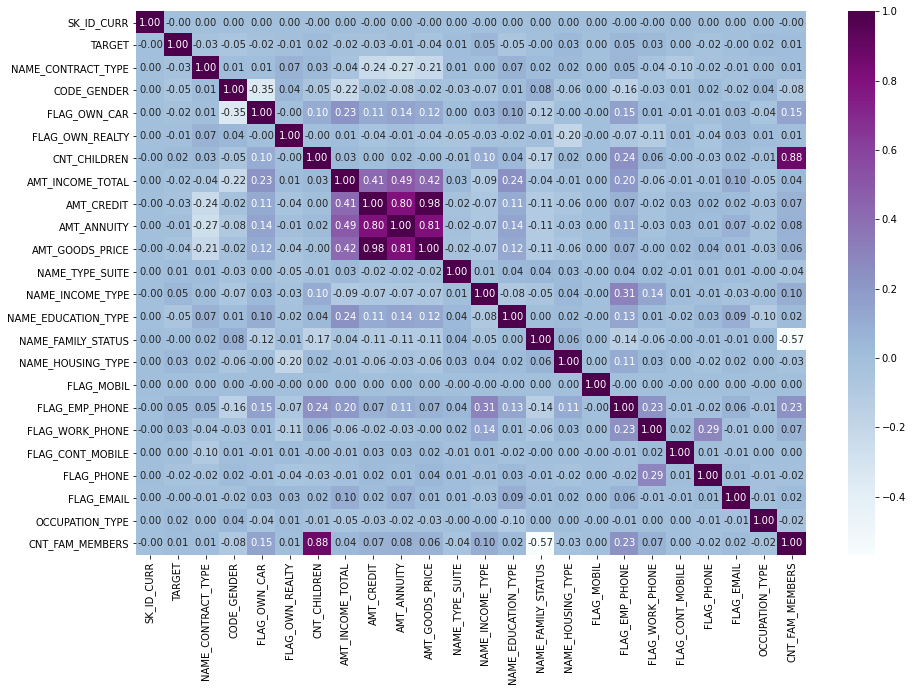

In [144]:
#use heatmap to show the correlation
plt.figure(figsize=(15,10))
sns.heatmap(corelation, annot=True, fmt = ".2f", cmap = "BuPu" )

Hapus coloum
1. CNT_CHildren

In [146]:
data = data.drop("CNT_CHILDREN",axis=1)
data_test = data_test.drop("CNT_CHILDREN",axis=1)

In [147]:
data.shape

(307221, 23)

### Data Test

In [148]:
categorical_test = data_test.select_dtypes(include="object")
col_names_cat_test = categorical_test.columns

In [149]:
le = LabelEncoder() 
data_test = data_test.apply(lambda col_names_cat_test: le.fit_transform(col_names_cat_test)) 
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,0,1,0,1,272,1318,2344,274,6,6,2,1,1,1,1,0,1,0,1,8,1
1,1,0,0,0,1,181,377,1820,91,6,6,1,1,1,1,1,0,1,0,0,9,1
2,2,0,0,1,1,402,1546,7132,364,6,6,2,1,1,1,1,0,1,0,0,4,1
3,3,0,1,0,1,492,2729,6049,626,6,6,1,1,1,1,1,0,1,1,0,14,3
4,4,0,0,1,0,366,1454,4108,363,6,6,1,1,1,1,1,1,1,0,0,8,2


In [150]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48720 entries, 0 to 48743
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SK_ID_CURR           48720 non-null  int64
 1   NAME_CONTRACT_TYPE   48720 non-null  int64
 2   CODE_GENDER          48720 non-null  int64
 3   FLAG_OWN_CAR         48720 non-null  int64
 4   FLAG_OWN_REALTY      48720 non-null  int64
 5   AMT_INCOME_TOTAL     48720 non-null  int64
 6   AMT_CREDIT           48720 non-null  int64
 7   AMT_ANNUITY          48720 non-null  int64
 8   AMT_GOODS_PRICE      48720 non-null  int64
 9   NAME_TYPE_SUITE      48720 non-null  int32
 10  NAME_INCOME_TYPE     48720 non-null  int32
 11  NAME_EDUCATION_TYPE  48720 non-null  int64
 12  NAME_FAMILY_STATUS   48720 non-null  int32
 13  NAME_HOUSING_TYPE    48720 non-null  int32
 14  FLAG_MOBIL           48720 non-null  int64
 15  FLAG_EMP_PHONE       48720 non-null  int64
 16  FLAG_WORK_PHONE      4

### Normalization

In [56]:
data_x = data.drop("TARGET", axis=1)
target = data["TARGET"]

In [57]:
from collections import Counter
print(sorted(Counter(target).items()))

[(0, 282417), (1, 24804)]


In [58]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampler , y_resampler = rus.fit_resample(data_x,target)
print(sorted(Counter(y_resampler).items()), y_resampler.shape)

[(0, 24804), (1, 24804)] (49608,)


### Separated Data

In [59]:
X = x_resampler
Y = y_resampler

In [60]:
# membagi dataframe menjadi data train dan data test
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [61]:
X_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
26023,15580,0,1,0,1,0,0.794303,0.431366,8081,432,...,3,5,1,1,0,1,0,0,8,0
29397,57064,0,1,0,0,1,-0.676814,-0.081807,4984,289,...,3,1,1,1,0,1,0,0,8,1
43230,227396,0,1,0,1,0,0.321815,0.764334,5968,449,...,3,1,1,1,0,1,0,0,8,0
20672,247216,0,0,0,1,0,0.917185,0.955661,5984,631,...,1,1,1,1,0,1,0,0,6,1
31761,86390,0,0,1,1,0,-0.477780,0.575232,8423,469,...,1,1,1,1,0,1,0,0,8,1


In [62]:
X_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
10722,142872,0,1,0,1,0,-0.019138,-1.313568,90,11,...,1,1,1,0,0,1,0,0,8,1
38109,163614,0,0,0,1,0,1.420826,0.283050,10492,469,...,3,1,1,1,0,1,1,0,8,0
20311,157627,0,1,0,1,0,-0.889693,-0.769250,2220,92,...,2,2,1,1,0,1,0,0,1,0
49052,300189,0,0,0,0,0,1.166409,-0.382887,3965,289,...,1,1,1,1,0,1,0,0,16,1
28636,47469,0,0,1,1,0,0.998529,0.096172,2978,418,...,1,1,1,1,1,1,0,0,4,1


### Modeling

Logistic Regression

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [64]:
# do the modeling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

Bandingkan Hasil

In [65]:
#predict
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [66]:
#train
Y_pred_train = model.predict(X_train)
Y_pred_train

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Evaluation

In [67]:
eval_classification(model, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.54
Precision (Test Set): 0.53
Recall (Test Set): 0.62
F1-Score (Test Set): 0.57
AUC: 0.54


In [68]:
print("Precision (Train Set): %.2f" % precision_score(Y_train, Y_pred_train))

Precision (Train Set): 0.54


Random Forest

In [69]:
# random forest process to classification data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)

Y_pred = rf.predict(X_test)
eval_classification(rf, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 0.57
F1-Score (Test Set): 0.59
AUC: 0.60


Do Hyperparameter Tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(X_train,Y_train)

# Predict & Evaluation
Y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.61
Precision (Test Set): 0.62
Recall (Test Set): 0.58
F1-Score (Test Set): 0.60
AUC: 0.61


Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(X_train,Y_train)

Y_pred = Dt.predict(X_test)
eval_classification(model, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.54
Precision (Test Set): 0.53
Recall (Test Set): 0.53
F1-Score (Test Set): 0.53
AUC: 0.54


In [72]:
print('Train score: ' + str(model.score(X_train, Y_train))) #accuracy
print('Test score:' + str(model.score(X_test, Y_test))) #accuracy

Train score: 0.5478148685695855
Test score:0.5423318819545234


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, Y_train)

# Predict & Evaluation
Y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.60
Recall (Test Set): 0.54
F1-Score (Test Set): 0.57
AUC: 0.59


In [74]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 8
Best min_samples_split: 5
Best min_samples_leaf: 1
Best max_features: sqrt


In [75]:
print('Train score: ' + str(model.score(X_train, Y_train)))
print('Test score:' + str(model.score(X_test, Y_test)))

Train score: 0.6149230677835205
Test score:0.6021253602305475


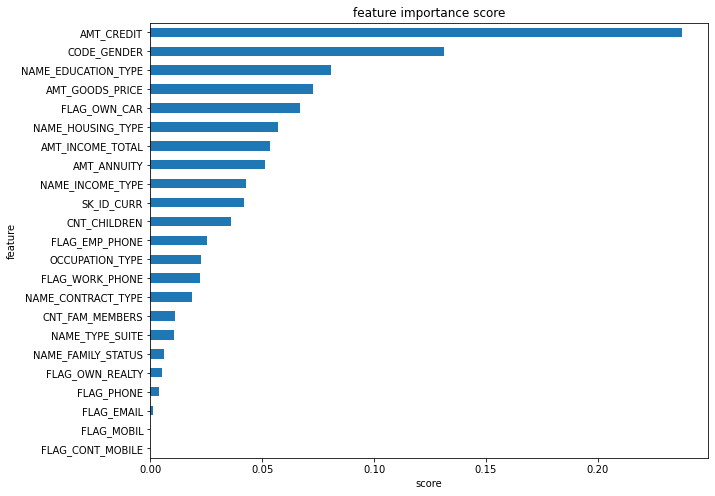

In [76]:
show_feature_importance(model.best_estimator_)

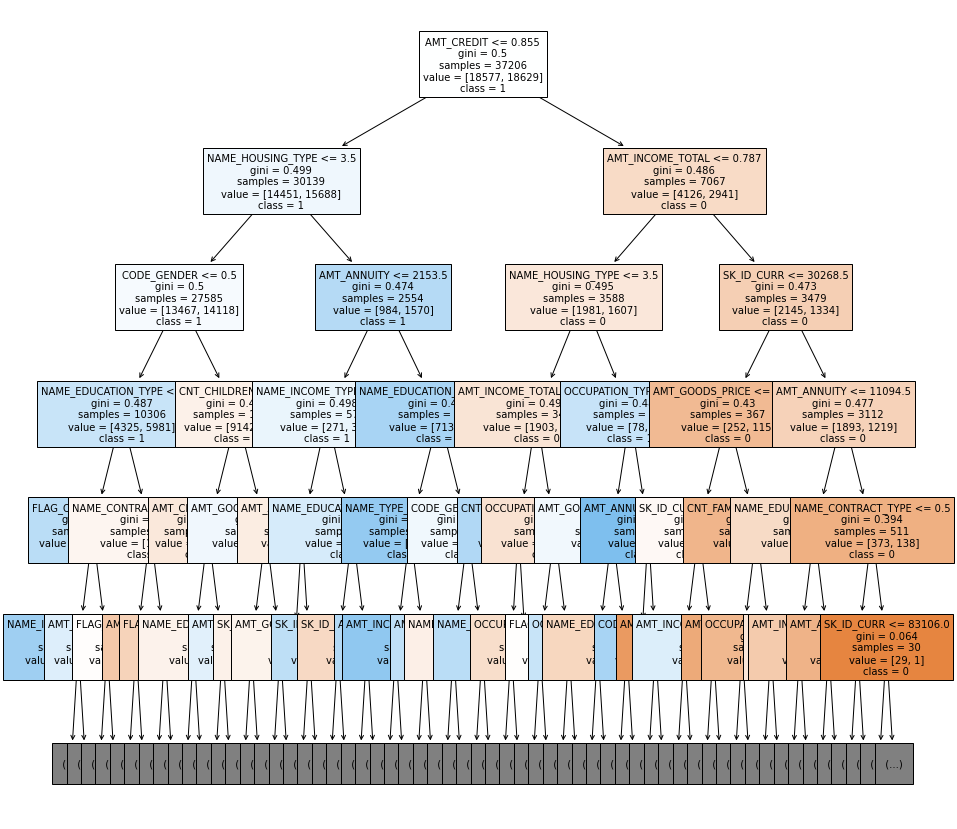

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Adaboost

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,Y_train)

Y_pred = ab.predict(X_test)
eval_classification(ab, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.61
Precision (Test Set): 0.61
Recall (Test Set): 0.61
F1-Score (Test Set): 0.61
AUC: 0.61


In [79]:
print('Train score: ' + str(ab.score(X_train, Y_train))) #accuracy
print('Test score:' + str(ab.score(X_test, Y_test))) #accuracy

Train score: 0.6150889641455679
Test score:0.6108692146427995


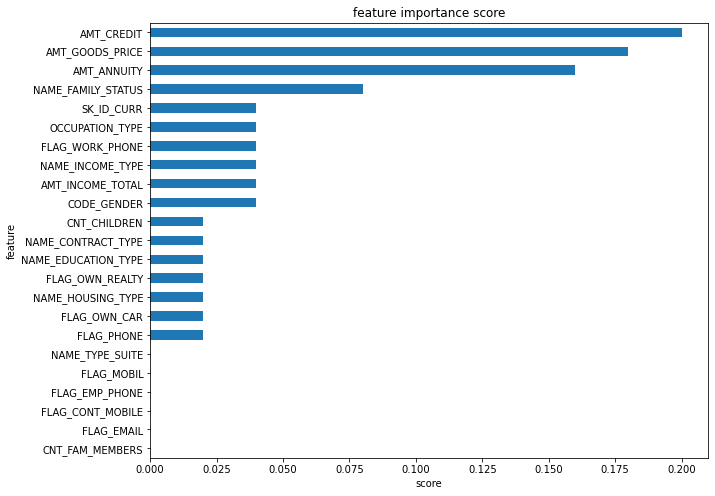

In [80]:
show_feature_importance(ab)

In [81]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='precision')
ab_tuned.fit(X_train,Y_train)

# Predict & Evaluation
Y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.62
Recall (Test Set): 0.61
F1-Score (Test Set): 0.62
AUC: 0.62


In [82]:
print('Train score: ' + str(ab_tuned.score(X_train, Y_train))) #accuracy
print('Test score:' + str(ab_tuned.score(X_test, Y_test))) #accuracy

Train score: 0.617117359281759
Test score:0.6157091853294385


In [83]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


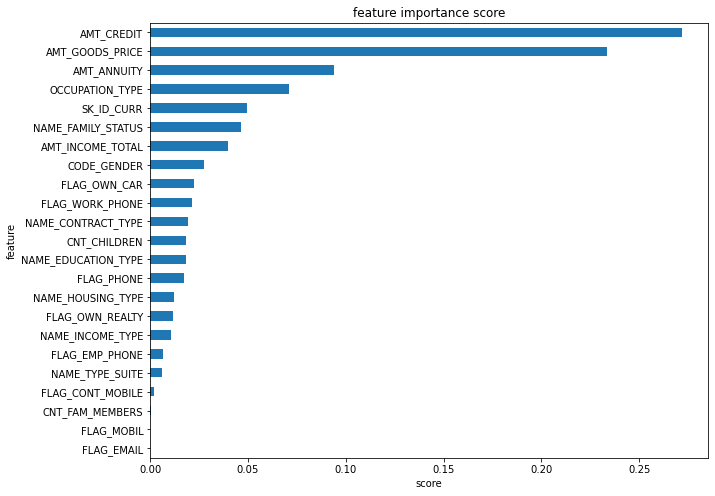

In [84]:
show_feature_importance(ab_tuned.best_estimator_)

XGBoost

In [85]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pd.set_option("max_column",100)
pd.set_option("max_colwidth",1000)
pd.set_option("max_row",1000)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [86]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, Y_train)

Y_pred = xg.predict(X_test)
eval_classification(xg, Y_pred, X_train, Y_train, X_test, Y_test)

[20:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.61
Precision (Test Set): 0.61
Recall (Test Set): 0.60
F1-Score (Test Set): 0.61
AUC: 0.61


In [87]:
print('Train score: ' + str(xg.score(X_train, Y_train))) #accuracy
print('Test score:' + str(xg.score(X_test, Y_test))) #accuracy

Train score: 0.7388862011503521
Test score:0.6126431220770844


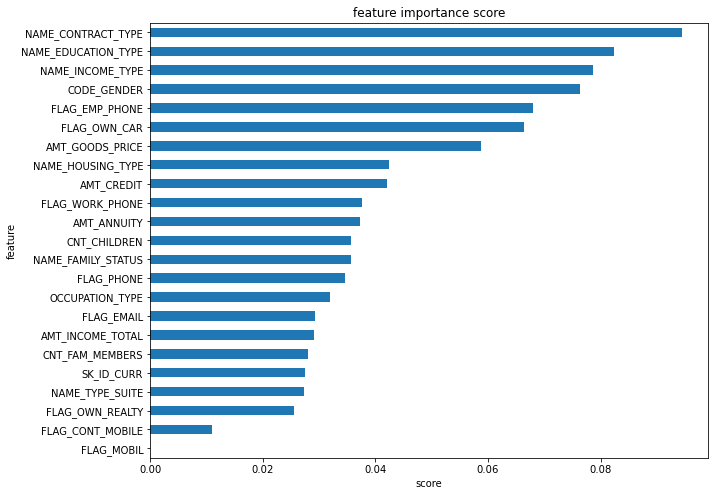

In [88]:
show_feature_importance(xg)

In [89]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(X_train,Y_train)

# Predict & Evaluation
Y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, Y_pred, X_train, Y_train, X_test, Y_test)

[20:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [90]:
eval_classification(xg_tuned, Y_pred, X_train, Y_train, X_test, Y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.62
Recall (Test Set): 0.61
F1-Score (Test Set): 0.61
AUC: 0.62


In [91]:
print('Train score: ' + str(xg_tuned.score(X_train, Y_train))) #accuracy
print('Test score:' + str(xg_tuned.score(X_test, Y_test))) #accuracy

Train score: 0.7817339149400218
Test score:0.6178512396694215


In [92]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 70
Best min_child_weight: 10
Best gamma: 0.8
Best tree_method: auto
Best colsample_bytree: 0.5
Best eta: 0.020202020202020204
Best lambda: 0.8
Best alpha: 0.6000000000000001


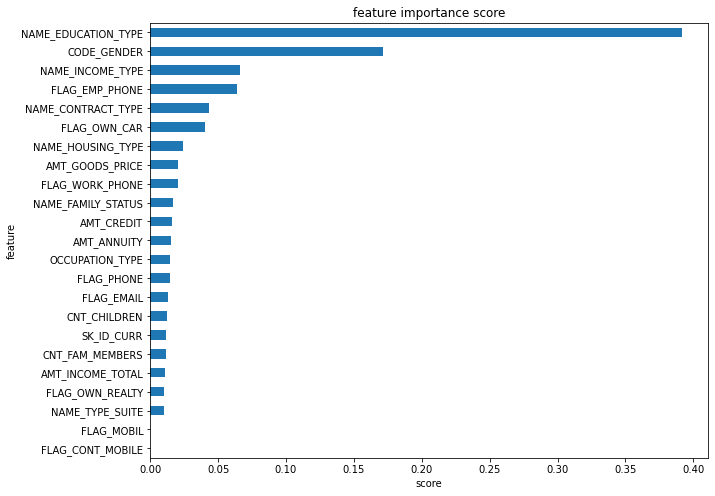

In [93]:
show_feature_importance(xg_tuned.best_estimator_)